<a href="https://colab.research.google.com/drive/1Fgv6mY_VdoX2Y8evlBdq4bI2bSqUg774?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source

- https://github.com/huggingface/datasets/blob/main/notebooks/Overview.ipynb
- https://github.com/huggingface/notebooks/blob/main/datasets_doc/en/tensorflow/quickstart.ipynb
- https://huggingface.co/docs/datasets/process

# HuggingFace 🤗 Datasets library - Quick overview

Models come and go (linear models, LSTM, Transformers, ...) but two core elements have consistently been the beating heart of Natural Language Processing: Datasets & Metrics

🤗 Datasets is a fast and efficient library to easily share and load datasets, already providing access to the public datasets in the [Hugging Face Hub](https://huggingface.co/datasets).

The library has several interesting features (besides easy access to datasets):

- Build-in interoperability with PyTorch, Tensorflow 2, Pandas and Numpy
- Lighweight and fast library with a transparent and pythonic API
- Strive on large datasets: frees you from RAM memory limits, all datasets are memory-mapped on drive by default.
- Smart caching with an intelligent `tf.data`-like cache: never wait for your data to process several times

🤗 Datasets originated from a fork of the awesome Tensorflow-Datasets and the HuggingFace team want to deeply thank the team behind this amazing library and user API. We have tried to keep a layer of compatibility with `tfds` and can provide conversion from one format to the other.
To learn more about how to use metrics, take a look at the library 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index)! In addition to metrics, you can find more tools for evaluating models and datasets.

# Main datasets API

This notebook is a quick dive in the main user API for loading datasets in `datasets`

In [ ]:
# install datasets
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
# Let's import the library. We typically only need at most two methods:
from datasets import list_datasets, load_dataset

from pprint import pprint

## Listing the currently available datasets

In [ ]:
# Currently available datasets
datasets = list_datasets()

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets[:100] + [f"{len(datasets) - 100} more..."], compact=True)

<ipython-input-3-2cd671b4f77b>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


🤩 Currently 160739 datasets are available on the hub:
['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2',
 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus',
 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue',
 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews',
 'tblard/allocine', 'mutiyama/alt', 'fancyzhx/amazon_polarity',
 'defunct-datasets/amazon_reviews_multi', 'defunct-datasets/amazon_us_reviews',
 'sewon/ambig_qa', 'nala-cub/americas_nli', 'legacy-datasets/ami',
 'gavinxing/amttl', 'facebook/anli', 'sealuzh/app_reviews', 'deepmind/aqua_rat',
 'google-research-datasets/aquamuse', 'bigIR/ar_cov19',
 'hadyelsahar/ar_res_reviews', 'iabufarha/ar_sarcasm',
 'abuelkhair-corpus/arabic_billion_words', 'QCRI/arabic_pos_dialect',
 'halabi2016/arabic_speech_corpus', 'hsseinmz/arcd', 'ramybaly/arsentd_lev',
 'allenai/art', 'arxiv-community/arxiv_dataset', 'tuanphong/ascent_kb',
 'achrafothman/aslg_pc12', 'AmazonScience/a

## An example with SQuAD

In [ ]:
# Downloading and loading a dataset
dataset = load_dataset('squad', split='validation[:10%]')

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

This call to `datasets.load_dataset()` does the following steps under the hood:

1. Download and import in the library the **SQuAD python processing script** from HuggingFace AWS bucket if it's not already stored in the library. You can find the SQuAD processing script [here](https://github.com/huggingface/datasets/tree/master/datasets/squad/squad.py) for instance.

   Processing scripts are small python scripts which define the info (citation, description) and format of the dataset and contain the URL to the original SQuAD JSON files and the code to load examples from the original SQuAD JSON files.


2. Run the SQuAD python processing script which will:
    - **Download the SQuAD dataset** from the original URL (see the script) if it's not already downloaded and cached.
    - **Process and cache** all SQuAD in a structured Arrow table for each standard splits stored on the drive.

      Arrow table are arbitrarily long tables, typed with types that can be mapped to numpy/pandas/python standard types and can store nested objects. They can be directly access from drive, loaded in RAM or even streamed over the web.
    

3. Return a **dataset built from the splits** asked by the user (default: all); in the above example we create a dataset with the first 10% of the validation split.

In [ ]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info.__dict__)

{'builder_name': 'parquet',
 'citation': '',
 'config_name': 'plain_text',
 'dataset_name': 'squad',
 'dataset_size': 89834388,
 'description': '',
 'download_checksums': {'hf://datasets/squad@7b6d24c440a36b6815f21b70d25016731768db1f/plain_text/train-00000-of-00001.parquet': {'checksum': None,
                                                                                                                                 'num_bytes': 14458314},
                        'hf://datasets/squad@7b6d24c440a36b6815f21b70d25016731768db1f/plain_text/validation-00000-of-00001.parquet': {'checksum': None,
                                                                                                                                      'num_bytes': 1819889}},
 'download_size': 16278203,
 'features': {'answers': Sequence(feature={'answer_start': Value(dtype='int32',
                                                                 id=None),
                                           'text': Value(dt

## Inspecting and using the dataset: elements, slices and columns

The returned `Dataset` object is a memory mapped dataset that behaves similarly to a normal map-style dataset. It is backed by an Apache Arrow table which allows many interesting features.

In [ ]:
print(dataset)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1057
})


You can query it's length and get items or slices like you would do normally with a python mapping.

In [ ]:
print(f"👉 Dataset len(dataset): {len(dataset)}")
print("\n👉 First item 'dataset[0]':")
pprint(dataset[0])

👉 Dataset len(dataset): 1057

👉 First item 'dataset[0]':
{'answers': {'answer_start': [177, 177, 177],
             'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']},
 'context': 'Super Bowl 50 was an American football game to determine the '
            'champion of the National Football League (NFL) for the 2015 '
            'season. The American Football Conference (AFC) champion Denver '
            'Broncos defeated the National Football Conference (NFC) champion '
            'Carolina Panthers 24–10 to earn their third Super Bowl title. The '
            "game was played on February 7, 2016, at Levi's Stadium in the San "
            'Francisco Bay Area at Santa Clara, California. As this was the '
            '50th Super Bowl, the league emphasized the "golden anniversary" '
            'with various gold-themed initiatives, as well as temporarily '
            'suspending the tradition of naming each Super Bowl game with '
            'Roman numerals (under whic

In [ ]:
# Or get slices with several examples:
print("\n👉Slice of the two items 'dataset[10:12]':")
pprint(dataset[10:12])


👉Slice of the two items 'dataset[10:12]':
{'answers': [{'answer_start': [334, 334, 334],
              'text': ['February 7, 2016', 'February 7', 'February 7, 2016']},
             {'answer_start': [177, 177, 177],
              'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']}],
 'context': ['Super Bowl 50 was an American football game to determine the '
             'champion of the National Football League (NFL) for the 2015 '
             'season. The American Football Conference (AFC) champion Denver '
             'Broncos defeated the National Football Conference (NFC) champion '
             'Carolina Panthers 24–10 to earn their third Super Bowl title. '
             "The game was played on February 7, 2016, at Levi's Stadium in "
             'the San Francisco Bay Area at Santa Clara, California. As this '
             'was the 50th Super Bowl, the league emphasized the "golden '
             'anniversary" with various gold-themed initiatives, as well as '
   

In [ ]:
# You can get a full column of the dataset by indexing with its name as a string:
print(dataset['question'][:10])

['Which NFL team represented the AFC at Super Bowl 50?', 'Which NFL team represented the NFC at Super Bowl 50?', 'Where did Super Bowl 50 take place?', 'Which NFL team won Super Bowl 50?', 'What color was used to emphasize the 50th anniversary of the Super Bowl?', 'What was the theme of Super Bowl 50?', 'What day was the game played on?', 'What is the AFC short for?', 'What was the theme of Super Bowl 50?', 'What does AFC stand for?']


The `__getitem__` method will return different format depending on the type of query:

- Items like `dataset[0]` are returned as dict of elements.
- Slices like `dataset[10:20]` are returned as dict of lists of elements.
- Columns like `dataset['question']` are returned as a list of elements.

This may seems surprising at first but in our experiments it's actually a lot easier to use for data processing than returning the same format for each of these views on the dataset.

In particular, you can easily iterate along columns in slices, and also naturally permute consecutive indexings with identical results as showed here by permuting column indexing with elements and slices:

In [ ]:
print(dataset[0]['question'] == dataset['question'][0])
print(dataset[10:20]['context'] == dataset['context'][10:20])

True
True


### Dataset are internally typed and structured

The dataset is backed by one (or several) Apache Arrow tables which are typed and allows for fast retrieval and access as well as arbitrary-size memory mapping.

This means respectively that the format for the dataset is clearly defined and that you can load datasets of arbitrary size without worrying about RAM memory limitation (basically the dataset take no space in RAM, it's directly read from drive when needed with fast IO access).

In [ ]:
# You can inspect the dataset column names and types
print("Column names:")
pprint(dataset.column_names)
print("Features:")
pprint(dataset.features)

Column names:
['id', 'title', 'context', 'question', 'answers']
Features:
{'answers': Sequence(feature={'answer_start': Value(dtype='int32', id=None),
                              'text': Value(dtype='string', id=None)},
                     length=-1,
                     id=None),
 'context': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None)}


### Additional misc properties

In [ ]:
# Datasets also have shapes informations
print("The number of rows", dataset.num_rows, "also available as len(dataset)", len(dataset))
print("The number of columns", dataset.num_columns)
print("The shape (rows, columns)", dataset.shape)

The number of rows 1057 also available as len(dataset) 1057
The number of columns 5
The shape (rows, columns) (1057, 5)


## Modifying the dataset with `dataset.map`

Now that we know how to inspect our dataset we also want to update it. For that there is a powerful method `.map()` which is inspired by `tf.data` map method and that you can use to apply a function to each examples, independently or in batch.

`.map()` takes a callable accepting a dict as argument (same dict as the one returned by `dataset[i]`) and iterate over the dataset by calling the function on each example.

In [ ]:
# Let's print the length of each `context` string in our subset of the dataset
# (10% of the validation i.e. 1057 examples)

dataset.map(lambda example: print(len(example['context']), end=','))

Map:   0%|          | 0/1057 [00:00<?, ? examples/s]

775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,179,179,179,179,179,179,179,179,179,179,179,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1166,1166,1166,1166,1166,1166,1166,1

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1057
})

This is basically the same as doing

```python
for example in dataset:
    function(example)
```

The above examples was a bit verbose. We can control the logging level of 🤗 Datasets with it's logging module:


In [ ]:
from datasets import logging
logging.set_verbosity_warning()

dataset.map(lambda example: print(len(example['context']), end=','))

Map:   0%|          | 0/1057 [00:00<?, ? examples/s]

775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,179,179,179,179,179,179,179,179,179,179,179,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1166,1166,1166,1166,1166,1166,1166,1

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1057
})

In [ ]:
# Let's keep it verbose for our tutorial though
from datasets import logging
logging.set_verbosity_info()

The above example had no effect on the dataset because the method we supplied to `.map()` didn't return a `dict` or a `abc.Mapping` that could be used to update the examples in the dataset.

In such a case, `.map()` will return the same dataset (`self`).

Now let's see how we can use a method that actually modify the dataset.

### Modifying the dataset example by example

The main interest of `.map()` is to update and modify the content of the table and leverage smart caching and fast backend.

To use `.map()` to update elements in the table you need to provide a function with the following signature: `function(example: dict) -> dict`.

In [ ]:
# Let's add a prefix 'My cute title: ' to each of our titles

def add_prefix_to_title(example):
    example['title'] = 'My cute title: ' + example['title']
    return example

prefixed_dataset = dataset.map(add_prefix_to_title)

print(prefixed_dataset.unique('title'))  # `.unique()` is a super fast way to print the unique elemnts in a column (see the doc for all the methods)

Map:   0%|          | 0/1057 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-6e8b14078bad8590.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-6e8b14078bad8590.arrow


['My cute title: Super_Bowl_50', 'My cute title: Warsaw']


This call to `.map()` compute and return the updated table. It will also store the updated table in a cache file indexed by the current state and the mapped function.

A subsequent call to `.map()` (even in another python session) will reuse the cached file instead of recomputing the operation.

You can test this by running again the previous cell, you will see that the result are directly loaded from the cache and not re-computed again.

The updated dataset returned by `.map()` is (again) directly memory mapped from drive and not allocated in RAM.

The function you provide to `.map()` should accept an input with the format of an item of the dataset: `function(dataset[0])` and return a python dict.

The columns and type of the outputs can be different than the input dict. In this case the new keys will be added as additional columns in the dataset.

Bascially each dataset example dict is updated with the dictionary returned by the function like this: `example.update(function(example))`.

In [ ]:
# Since the input example dict is updated with our function output dict,
# we can actually just return the updated 'title' field
titled_dataset = dataset.map(lambda example: {'title': 'My cutest title: ' + example['title']})

print(titled_dataset.unique('title'))

Map:   0%|          | 0/1057 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-7289ae9d6e8d19c3.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-7289ae9d6e8d19c3.arrow


['My cutest title: Super_Bowl_50', 'My cutest title: Warsaw']


#### Removing columns
You can also remove columns when running map with the `remove_columns=List[str]` argument.

In [ ]:
# This will remove the 'title' column while doing the update (after having send it the the mapped function so you can use it in your function!)
less_columns_dataset = dataset.map(lambda example: {'new_title': 'Wouhahh: ' + example['title']}, remove_columns=['title'])

print(less_columns_dataset.column_names)
print(less_columns_dataset.unique('new_title'))

Map:   0%|          | 0/1057 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-c27730d747a58b56.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-c27730d747a58b56.arrow


['id', 'context', 'question', 'answers', 'new_title']
['Wouhahh: Super_Bowl_50', 'Wouhahh: Warsaw']


#### Using examples indices
With `with_indices=True`, dataset indices (from `0` to `len(dataset)`) will be supplied to the function which must thus have the following signature: `function(example: dict, indice: int) -> dict`

In [ ]:
# This will add the index in the dataset to the 'question' field
with_indices_dataset = dataset.map(lambda example, idx: {'question': f'{idx}: ' + example['question']},
                                   with_indices=True)

pprint(with_indices_dataset['question'][:5])

Map:   0%|          | 0/1057 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-200df1484eb9b0df.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/0.0.0/7b6d24c440a36b6815f21b70d25016731768db1f/cache-200df1484eb9b0df.arrow


['0: Which NFL team represented the AFC at Super Bowl 50?',
 '1: Which NFL team represented the NFC at Super Bowl 50?',
 '2: Where did Super Bowl 50 take place?',
 '3: Which NFL team won Super Bowl 50?',
 '4: What color was used to emphasize the 50th anniversary of the Super Bowl?']


### Modifying the dataset with batched updates

`.map()` can also work with batch of examples (slices of the dataset).

This is particularly interesting if you have a function that can handle batch of inputs like the tokenizers of HuggingFace `tokenizers`.

To work on batched inputs set `batched=True` when calling `.map()` and supply a function with the following signature: `function(examples: Dict[List]) -> Dict[List]` or, if you use indices, `function(examples: Dict[List], indices: List[int]) -> Dict[List]`).

Bascially, your function should accept an input with the format of a slice of the dataset: `function(dataset[:10])`.

In [ ]:
!pip install -q transformers

### Image datasets

Images are loaded using Pillow:

In [ ]:
image_dataset = load_dataset("cats_vs_dogs", split="train")
image_dataset[0]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1491: FutureWarning: The repository for cats_vs_dogs contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/cats_vs_dogs
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
https://huggingface.co/datasets/cats_vs_dogs/resolve/main/cats_vs_dogs.py not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/1195b2fc99b56009f2430c92638bf8148448a776dd5946f7b55e06f1fbe80e4f.9a5dc6f1cc0657392f8b635af2ad433d372363aa9e9e2e1db0621b47359b20dd.py.incomplete
INFO:datasets.utils.file_utils:https://huggingface.co/datasets/cats_vs_dogs/resolve/main/cats_vs_dogs.py not found in cache or force_download set to True, downloading to /root/.cache/huggingf

storing https://huggingface.co/datasets/cats_vs_dogs/resolve/main/cats_vs_dogs.py in cache at /root/.cache/huggingface/datasets/downloads/1195b2fc99b56009f2430c92638bf8148448a776dd5946f7b55e06f1fbe80e4f.9a5dc6f1cc0657392f8b635af2ad433d372363aa9e9e2e1db0621b47359b20dd.py
INFO:datasets.utils.file_utils:storing https://huggingface.co/datasets/cats_vs_dogs/resolve/main/cats_vs_dogs.py in cache at /root/.cache/huggingface/datasets/downloads/1195b2fc99b56009f2430c92638bf8148448a776dd5946f7b55e06f1fbe80e4f.9a5dc6f1cc0657392f8b635af2ad433d372363aa9e9e2e1db0621b47359b20dd.py
creating metadata file for /root/.cache/huggingface/datasets/downloads/1195b2fc99b56009f2430c92638bf8148448a776dd5946f7b55e06f1fbe80e4f.9a5dc6f1cc0657392f8b635af2ad433d372363aa9e9e2e1db0621b47359b20dd.py
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/1195b2fc99b56009f2430c92638bf8148448a776dd5946f7b55e06f1fbe80e4f.9a5dc6f1cc0657392f8b635af2ad433d372363aa9e9e2e1db0621b47

storing https://huggingface.co/datasets/cats_vs_dogs/resolve/main/README.md in cache at /root/.cache/huggingface/datasets/downloads/f209dcd7208b0a711032a1472e8b70e548623b0402189bec62e83521ed4c6a4c.1be2a1d7ccf181de39f1168d86aab6d34dd5fe6fb4e2ce3a41fd411bbb13a473
INFO:datasets.utils.file_utils:storing https://huggingface.co/datasets/cats_vs_dogs/resolve/main/README.md in cache at /root/.cache/huggingface/datasets/downloads/f209dcd7208b0a711032a1472e8b70e548623b0402189bec62e83521ed4c6a4c.1be2a1d7ccf181de39f1168d86aab6d34dd5fe6fb4e2ce3a41fd411bbb13a473
creating metadata file for /root/.cache/huggingface/datasets/downloads/f209dcd7208b0a711032a1472e8b70e548623b0402189bec62e83521ed4c6a4c.1be2a1d7ccf181de39f1168d86aab6d34dd5fe6fb4e2ce3a41fd411bbb13a473
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/f209dcd7208b0a711032a1472e8b70e548623b0402189bec62e83521ed4c6a4c.1be2a1d7ccf181de39f1168d86aab6d34dd5fe6fb4e2ce3a41fd411bbb13a473
Loading Data

storing https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip in cache at /root/.cache/huggingface/datasets/downloads/b3ae72dcb746c20d4d97732d23f28048affb0db6ca504e62efc69246261c5b96
INFO:datasets.utils.file_utils:storing https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip in cache at /root/.cache/huggingface/datasets/downloads/b3ae72dcb746c20d4d97732d23f28048affb0db6ca504e62efc69246261c5b96
creating metadata file for /root/.cache/huggingface/datasets/downloads/b3ae72dcb746c20d4d97732d23f28048affb0db6ca504e62efc69246261c5b96
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/b3ae72dcb746c20d4d97732d23f28048affb0db6ca504e62efc69246261c5b96
INFO:datasets.download.download_manager:Downloading took 0.0 min
Checksum Computation took 0.0 min
INFO:datasets.download.download_manager:Checksum Computation took 0.0 min
Generating trai

Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

All the splits matched successfully.
INFO:datasets.utils.info_utils:All the splits matched successfully.
Dataset cats_vs_dogs downloaded and prepared to /root/.cache/huggingface/datasets/cats_vs_dogs/default/1.0.0/d4fe9cf31b294ed8639aa58f7d8ee13fe189011837038ed9a774fde19a911fcb. Subsequent calls will reuse this data.
INFO:datasets.builder:Dataset cats_vs_dogs downloaded and prepared to /root/.cache/huggingface/datasets/cats_vs_dogs/default/1.0.0/d4fe9cf31b294ed8639aa58f7d8ee13fe189011837038ed9a774fde19a911fcb. Subsequent calls will reuse this data.


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 'labels': 0}

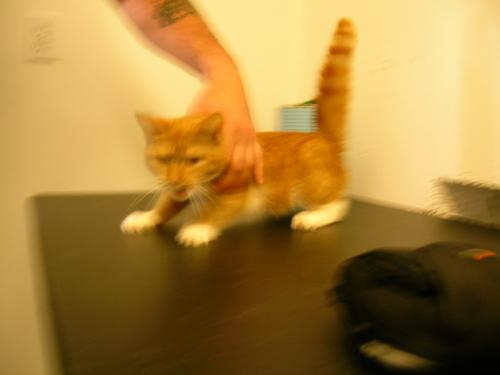

In [ ]:
image_dataset[0]["image"]

## Formatting outputs for Tensorflow

Now that we have tokenized our inputs, we probably want to use this dataset in a `torch.Dataloader` or a `tf.data.Dataset`. There are various ways to approach this.

There is also a convenience method, `to_tf_dataset()`, for the creation of `tf.data.Dataset` objects directly from a HuggingFace `Dataset`. An example will be shown below - when using this method, it is sufficient to pass the `columns` argument and your `DataCollator` - make sure you set the `return_tensors` argument of your `DataCollator` to `tf` or `np`, though, because TensorFlow won't be happy if you start passing it PyTorch Tensors!

In [ ]:
# Load the dataset
dataset = load_dataset("beans", split="train[:1%]")
print(len(dataset))
print(dataset.column_names)
dataset[0]

Overwrite dataset info from restored data version if exists.
INFO:datasets.builder:Overwrite dataset info from restored data version if exists.
Loading Dataset info from /root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5
INFO:datasets.info:Loading Dataset info from /root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5
Found cached dataset beans (/root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5)
INFO:datasets.builder:Found cached dataset beans (/root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5)
Loading Dataset info from /root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5
INFO:datasets.info:Loading Dataset info from /root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5


10
['image_file_path', 'image', 'labels']


{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0}

In [ ]:
import tensorflow as tf
from datasets import load_dataset

# define the transformation function
def preprocess_image(example):
    image = tf.image.convert_image_dtype(example["image"], tf.float32)
    image = tf.image.resize(image, [224, 224])
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_hue(image, max_delta=0.5)
    return {"pixel_values": image, "labels": example["labels"]}

# apply the transformation to the dataset
dataset = dataset.map(preprocess_image)

# convert to TensorFlow dataset
tf_dataset = dataset.to_tf_dataset(
    columns=["pixel_values"],
    label_cols="labels",
    batch_size=5,
    shuffle=True,
    collate_fn=lambda x: {"pixel_values": tf.stack([i["pixel_values"] for i in x]), "labels": tf.stack([i["labels"] for i in x])},
)

# usage example
for batch in tf_dataset.take(1):
    pixel_values, labels = batch
    print(pixel_values.shape, labels.shape)

Loading cached processed dataset at /root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5/cache-5b54e47f28938303.arrow
INFO:datasets.arrow_dataset:Loading cached processed dataset at /root/.cache/huggingface/datasets/beans/default/0.0.0/27aa014ce09b193e1a6f58112d4a66e0eddb69c5/cache-5b54e47f28938303.arrow


(5, 224, 224, 3) (5,)
